In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls "drive/My Drive"

'Colab Notebooks'       Mivia_Processed_Data   Ravdess-Data
'Getting started.pdf'   Mivia-Saved	       Ravdess-Saved


In [6]:
!pip install librosa tensorflow-gpu keras kapre tqdm

In [7]:
import tensorflow as tf
print("tf version: ", tf.__version__)

tf version:  1.13.1


In [8]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [0]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('/content/drive/My Drive/Mivia_Processed_Data/glass/glass_00001_0_00.wav', sr=16000)

In [15]:
# data, sampling_rate = librosa.load('/content/drive/My Drive/Ravdess-Data/Actor_01/03-01-01-01-01-01-01.wav', sr=16000)
# librosa.output.write_wav('a.wav', data, sampling_rate)
# ipd.Audio('a.wav')

In [10]:
print("data: ", data)
print("length: ", len(data))

data:  [ 0.01032128  0.0133882  -0.00232497 ...  0.08990555  0.06620013
  0.        ]
length:  16864


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


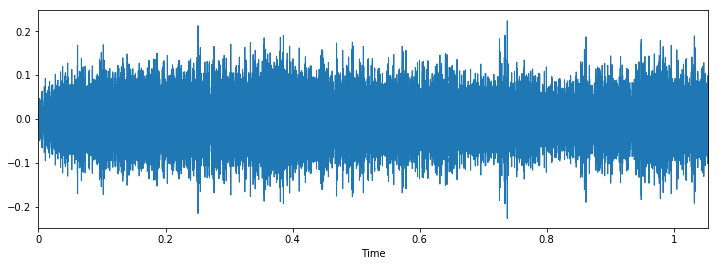

In [11]:
% pylab inline 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=16000)

In [12]:
import IPython.display as ipd
ipd.Audio('/content/drive/My Drive/Mivia_Processed_Data/glass/glass_00001_0_00.wav')


In [22]:
!nproc

2


In [43]:
import time
import os
from tqdm import tqdm

path = '/content/drive/My Drive/Mivia_Processed_Data/'
lst_X = []
lst_Y = []

start_time = time.time()
processed = []
for subdir, dirs, files in os.walk(path):
  print("Working in ", subdir)
  for file in files:
      try:
#         print(file.split('_')[-1].split('.')[0])
        if file.split('_')[-1].split('.')[0] == '6':
          print("on ", file)
          X, sample_rate = librosa.load(os.path.join(subdir,file),mono=True, sr=16000)
          file = str(subdir.split('/')[-1])
  #         print(file)
          pad_len = 16000 - X.shape[0]
          if pad_len  >= 0:
              X= np.pad(X,(0,pad_len),'constant')
          lst_X.append(X[:16000])
          lst_Y.append(file)
        else:
          continue
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

Working in  /content/drive/My Drive/Mivia_Processed_Data/
Working in  /content/drive/My Drive/Mivia_Processed_Data/glass
on  glass_00004_3_6.wav
on  glass_00033_6_6.wav
on  glass_00030_6_6.wav
on  glass_00029_28_6.wav
on  glass_00001_8_6.wav
on  glass_00007_16_6.wav
on  glass_00064_4_6.wav
on  glass_00061_19_6.wav
on  glass_00035_18_6.wav
on  glass_00065_33_6.wav
on  glass_00035_27_6.wav
on  glass_00047_29_6.wav
on  glass_00043_30_6.wav
on  glass_00043_25_6.wav
on  glass_00059_1_6.wav
on  glass_00042_16_6.wav
on  glass_00041_18_6.wav
on  glass_00010_8_6.wav
on  glass_00019_6_6.wav
on  glass_00030_31_6.wav
on  glass_00036_5_6.wav
on  glass_00007_12_6.wav
on  glass_00051_28_6.wav
on  glass_00052_2_6.wav
on  glass_00051_5_6.wav
on  glass_00047_23_6.wav
on  glass_00061_27_6.wav
on  glass_00061_28_6.wav
on  glass_00061_30_6.wav
on  glass_00062_0_6.wav
on  glass_00062_1_6.wav
on  glass_00062_5_6.wav
on  glass_00062_9_6.wav
on  glass_00062_21_6.wav
on  glass_00062_23_6.wav
on  glass_00062_26_

In [0]:
import numpy as np

cls_dict = {'glass': 0, 'gunshots': 1, 'screams': 2}
Y = np.array([cls_dict[i] for i in lst_Y])

X = np.asarray(lst_X)

In [0]:
import joblib

X_name = 'X.joblib'
Y_name = 'Y.joblib'
save_dir = '/content/drive/My Drive/Mivia-Saved'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(Y, os.path.join(save_dir, Y_name))

In [0]:
X = joblib.load('/content/drive/My Drive/Ravdess-Saved/X.joblib')
Y = joblib.load('/content/drive/My Drive/Ravdess-Saved/Y.joblib')

In [47]:
print("X: ", X.shape)
print("Y: ", Y.shape)

X:  (2100, 16000)
Y:  (2100,)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [49]:
print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)

X_train:  (1680, 16000)
Y_train:  (1680,)


In [50]:
X_train

array([2, 1, 0, ..., 1, 1, 1])

In [51]:
x_train = X_train.reshape(X_train.shape[0], 1, 16000)
x_test = X_test.reshape(X_test.shape[0], 1, 16000)
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)

x_train:  (1680, 1, 16000)
x_test:  (420, 1, 16000)


In [52]:
from keras.utils.np_utils import to_categorical
y_train, y_test = to_categorical(Y_train), to_categorical(Y_test)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

y_train:  (1680, 3)
y_test:  (420, 3)


Using TensorFlow backend.


In [53]:
X[0]

array([0.00350354, 0.00401465, 0.00326971, ..., 0.02911118, 0.0240683 ,
       0.0041075 ], dtype=float32)

In [0]:
# max_ = 0
# count = 0
# for i in range(x_train.shape[0]):
#   if len(x_train[i]) > 0: count += 1
#   if len(x_train[i]) > max_: max_ = len(x_train[i])

# print("max: ", max_)
# print("count: ", count)

In [0]:
from keras.optimizers import Optimizer
from keras import backend as K
import six
import copy
from six.moves import zip
from keras.utils.generic_utils import serialize_keras_object
from keras.utils.generic_utils import deserialize_keras_object
from keras.legacy import interfaces

class AdamW(Optimizer):
    """Adam optimizer.
    Default parameters follow those provided in the original paper.
    # Arguments
        lr: float >= 0. Learning rate.
        beta_1: float, 0 < beta < 1. Generally close to 1.
        beta_2: float, 0 < beta < 1. Generally close to 1.
        epsilon: float >= 0. Fuzz factor.
        decay: float >= 0. Learning rate decay over each update.
        weight_decay: float >= 0. Decoupled weight decay over each update.
    # References
        - [Adam - A Method for Stochastic Optimization](http://arxiv.org/abs/1412.6980v8)
        - [Optimization for Deep Learning Highlights in 2017](http://ruder.io/deep-learning-optimization-2017/index.html)
        - [Fixing Weight Decay Regularization in Adam](https://arxiv.org/abs/1711.05101)
    """

    def __init__(self, lr=0.001, beta_1=0.9, beta_2=0.999, weight_decay=1e-4,  # decoupled weight decay (1/6)
                 epsilon=1e-8, decay=0., **kwargs):
        super(AdamW, self).__init__(**kwargs)
        with K.name_scope(self.__class__.__name__):
            self.iterations = K.variable(0, dtype='int64', name='iterations')
            self.lr = K.variable(lr, name='lr')
            self.init_lr = lr # decoupled weight decay (2/6)
            self.beta_1 = K.variable(beta_1, name='beta_1')
            self.beta_2 = K.variable(beta_2, name='beta_2')
            self.decay = K.variable(decay, name='decay')
            self.wd = K.variable(weight_decay, name='weight_decay') # decoupled weight decay (3/6)
        self.epsilon = epsilon
        self.initial_decay = decay

    @interfaces.legacy_get_updates_support
    def get_updates(self, loss, params):
        grads = self.get_gradients(loss, params)
        self.updates = [K.update_add(self.iterations, 1)]
        wd = self.wd # decoupled weight decay (4/6)

        lr = self.lr
        if self.initial_decay > 0:
            lr *= (1. / (1. + self.decay * K.cast(self.iterations,
                                                  K.dtype(self.decay))))
        eta_t = lr / self.init_lr # decoupled weight decay (5/6)

        t = K.cast(self.iterations, K.floatx()) + 1
        lr_t = lr * (K.sqrt(1. - K.pow(self.beta_2, t)) /
                     (1. - K.pow(self.beta_1, t)))

        ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        vs = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
        self.weights = [self.iterations] + ms + vs

        for p, g, m, v in zip(params, grads, ms, vs):
            m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
            v_t = (self.beta_2 * v) + (1. - self.beta_2) * K.square(g)
            p_t = p - lr_t * m_t / (K.sqrt(v_t) + self.epsilon) - eta_t * wd * p # decoupled weight decay (6/6)

            self.updates.append(K.update(m, m_t))
            self.updates.append(K.update(v, v_t))
            new_p = p_t

            # Apply constraints.
            if getattr(p, 'constraint', None) is not None:
                new_p = p.constraint(new_p)

            self.updates.append(K.update(p, new_p))
        return self.updates

    def get_config(self):
        config = {'lr': float(K.get_value(self.lr)),
                  'beta_1': float(K.get_value(self.beta_1)),
                  'beta_2': float(K.get_value(self.beta_2)),
                  'decay': float(K.get_value(self.decay)),
                  'weight_decay': float(K.get_value(self.wd)),
                  'epsilon': self.epsilon}
        base_config = super(AdamW, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, AveragePooling2D, BatchNormalization
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from kapre.filterbank import Filterbank
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import kapre
from kapre.time_frequency import Melspectrogram,Spectrogram
from kapre.utils import Normalization2D
from kapre.augmentation import AdditiveNoise

input_shape = (1, 16000)
sr = 16000

model = Sequential()
model.add(Melspectrogram(n_dft=512, n_hop=512, input_shape=input_shape,
                         padding='same', sr=sr, n_mels=128,
                         fmin=0.0, fmax=sr/2, power_melgram=1.0,
                         return_decibel_melgram=False, trainable_fb=False,
                         trainable_kernel=False,
                         name='trainable_stft'))
# Maybe some additive white noise.
model.add(AdditiveNoise(power=0.2))
# If you wanna normalise it per-frequency
model.add(Normalization2D(str_axis='freq'))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(9, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(11, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(10, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(11, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(Conv2D(45, kernel_size=(3, 3), activation='relu',dim_ordering="th"))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
trainable_stft (Melspectrogr (None, 128, 32, 1)        296064    
_________________________________________________________________
additive_noise_2 (AdditiveNo (None, 128, 32, 1)        0         
_________________________________________________________________
normalization2d_2 (Normaliza (None, 128, 32, 1)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 126, 30, 30)       300       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 28, 28)         9080      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 26, 26)        2190      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 24, 24)         2439      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, kernel_size=(3, 3), activation="relu", data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, kernel_size=(3, 3), activation="relu", data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(9, kernel_size=(3, 3), activation="relu", data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, kernel_size=(3, 3), activation="relu", data_format="channels_first")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(11, kernel_size=(3, 3), activation="relu", dat

In [0]:
opt = keras.optimizers.adam()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,metrics=['accuracy'])

In [60]:
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Train on 1680 samples, validate on 420 samples
Epoch 1/10
1680/1680 [==============================] - 1s 795us/step - loss: 0.9994 - acc: 0.4315 - val_loss: 0.7149 - val_acc: 0.7048
Epoch 2/10
1680/1680 [==============================] - 0s 234us/step - loss: 0.2917 - acc: 0.9131 - val_loss: 0.0687 - val_acc: 0.9833
Epoch 3/10
1680/1680 [==============================] - 0s 232us/step - loss: 0.0777 - acc: 0.9714 - val_loss: 0.0469 - val_acc: 0.9833
Epoch 4/10
1680/1680 [==============================] - 0s 236us/step - loss: 0.0470 - acc: 0.9851 - val_loss: 0.0219 - val_acc: 0.9952
Epoch 5/10
1680/1680 [==============================] - 0s 233us/step - loss: 0.0190 - acc: 0.9917 - val_loss: 0.0112 - val_acc: 0.9976
Epoch 6/10
1680/1680 [==============================] - 0s 238us/step - loss: 0.0069 - acc: 0.9976 - val_loss: 0.0029 - val_acc: 0.9976
Epoch 7/10
1680/1680 [==============================] - 0s 234us/step - loss: 0.0027 - acc: 0.9994 - val_loss: 0.0018 - val_acc: 0.9976
E

In [62]:
count = 0
preds = model.predict(x_test)
for i in range(y_test.shape[0]):
  if np.argmax(preds[i]) == np.argmax(y_test[i]):
    count += 1
print(count)

420
